# Lab 16: Ordinary Differential Equations - Initial Value Problems

This notebook demonstrates three fundamental numerical integration methods for solving initial value problems (IVPs):

1. **Euler's Method** - Simple first-order method
2. **Runge-Kutta Methods** (RK4) - Fourth-order accurate method
3. **Verlet Integration** - Symplectic method ideal for conservative systems

We'll apply these methods to a few example problems in physics and examine their performance.

In [1]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Set up plotting style - make figures a little more visiually appealing, but optional 
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

## 1. Methods

### 1.1 Euler's Method

Euler's method is the simplest numerical integration technique. For an ODE of the form:

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0$$

The Euler method approximates the solution using:

$$y_{n+1} = y_n + h \cdot f(t_n, y_n)$$

where $h$ is the time step.

**Advantages:**
- Simple to understand and implement
- Computationally inexpensive

**Disadvantages:**
- Only first-order accurate: $O(h)$ local error, $O(h)$ global error
- Can be unstable for stiff equations
- Poor energy conservation for mechanical systems

In [2]:
def euler_method(f, t_span, y0, h):
    """
    Solve ODE using Euler's method.
    
    Parameters:
    -----------
    f : callable
        Function f(t, y) that defines dy/dt = f(t, y)
    t_span : tuple
        (t_start, t_end) - time interval
    y0 : array_like
        Initial conditions
    h : float
        Time step size
    
    Returns:
    --------
    t : ndarray
        Time points
    y : ndarray
        Solution at each time point
    """
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + h, h)
    n_steps = len(t)
    
    y0 = np.atleast_1d(y0)
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0
    
    for i in range(n_steps - 1):
        y[i+1] = y[i] + h * f(t[i], y[i])
    
    return t, y

### 1.2 Runge-Kutta Method (4th order - RK4)

The fourth-order Runge-Kutta method (RK4) is one of the most widely used numerical integration schemes. It achieves fourth-order accuracy by evaluating the derivative at multiple points within each time step:

$$k_1 = f(t_n, y_n)$$
$$k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)$$
$$k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)$$
$$k_4 = f(t_n + h, y_n + h k_3)$$
$$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

**Advantages:**
- Fourth-order accurate: $O(h^4)$ local error, $O(h^4)$ global error
- Good balance between accuracy and computational cost
- More stable than Euler's method

**Disadvantages:**
- More complex than Euler's method
- Four function evaluations per step
- Still doesn't conserve energy perfectly for long-time integration

In [3]:
def rk4_method(f, t_span, y0, h):
    """
    Solve ODE using 4th-order Runge-Kutta method.
    
    Parameters:
    -----------
    f : callable
        Function f(t, y) that defines dy/dt = f(t, y)
    t_span : tuple
        (t_start, t_end) - time interval
    y0 : array_like
        Initial conditions
    h : float
        Time step size
    
    Returns:
    --------
    t : ndarray
        Time points
    y : ndarray
        Solution at each time point
    """
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + h, h)
    n_steps = len(t)
    
    y0 = np.atleast_1d(y0)
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0
    
    for i in range(n_steps - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, y

### 1.3 Verlet Integration

The Verlet algorithm is particularly useful for systems in classical mechanics. It's a **symplectic integrator**, meaning it preserves the symplectic structure of Hamiltonian systems and exhibits more robust long-term energy conservation compared to RK.

For a second-order ODE:
$$\frac{d^2x}{dt^2} = a(t, x)$$

The **velocity Verlet** algorithm proceeds as:

$$x_{n+1} = x_n + v_n h + \frac{1}{2}a_n h^2$$
$$v_{n+1} = v_n + \frac{1}{2}(a_n + a_{n+1})h$$

**Advantages:**
- Symplectic: conserves energy very well over long times
- Time-reversible
- Second-order accurate
- Ideal for molecular dynamics and N-body simulations

**Disadvantages:**
- Only applicable to second-order ODEs (but most physics problems are!)
- Requires acceleration as a function of position

In [4]:
def verlet_method(a, t_span, x0, v0, h):
    """
    Solve second-order ODE using Velocity Verlet method.
    
    For d²x/dt² = a(t, x, v)
    
    Parameters:
    -----------
    a : callable
        Acceleration function a(t, x, v)
    t_span : tuple
        (t_start, t_end) - time interval
    x0 : array_like
        Initial position
    v0 : array_like
        Initial velocity
    h : float
        Time step size
    
    Returns:
    --------
    t : ndarray
        Time points
    x : ndarray
        Position at each time point
    v : ndarray
        Velocity at each time point
    """
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + h, h)
    n_steps = len(t)
    
    x0 = np.atleast_1d(x0)
    v0 = np.atleast_1d(v0)
    
    x = np.zeros((n_steps, len(x0)))
    v = np.zeros((n_steps, len(v0)))
    x[0] = x0
    v[0] = v0
    
    for i in range(n_steps - 1):
        a_curr = a(t[i], x[i], v[i])
        
        # Update position
        x[i+1] = x[i] + v[i] * h + 0.5 * a_curr * h**2
        
        # Calculate new acceleration
        a_next = a(t[i+1], x[i+1], v[i])  # Use approximate velocity
        
        # Update velocity
        v[i+1] = v[i] + 0.5 * (a_curr + a_next) * h
    
    return t, x, v

---
## 2. Examples

Now let's apply these methods to a few example problems!

### 2.1 Simple Harmonic Oscillator (Mass-Spring System)

A mass attached to a spring with spring constant $k$ and mass $m$ follows:

$$m\frac{d^2x}{dt^2} = -kx$$

or equivalently:

$$\frac{d^2x}{dt^2} = -\omega^2 x$$

where $\omega = \sqrt{k/m}$ is the natural frequency.

**Analytical Solution:** $x(t) = A\cos(\omega t + \phi)$

**Energy Conservation:** Total energy $E = \frac{1}{2}m v^2 + \frac{1}{2}k x^2$ should be constant.

Start by setting up the system and parameters in the cell below

In [5]:
# Parameters
omega = 2.0  # Natural frequency (rad/s)
A = 1.0      # Amplitude (m)
t_span = (0, 10)  # Time interval
h = 0.1      # Time step

# Initial conditions
x0 = A       # Initial position
v0 = 0.0     # Initial velocity

# For Euler and RK4, we need to convert to first-order system
# Let y = [x, v], then dy/dt = [v, -omega^2 * x]
def harmonic_oscillator(t, y):
    x, v = y
    return np.array([v, -omega**2 * x])

# For Verlet, we need acceleration as a function
def harmonic_acceleration(t, x, v):
    return -omega**2 * x

Let's now solve the ODE by calling all three of the earlier defined methods

In [6]:
# Solve using all three methods
t_euler, y_euler = euler_method(harmonic_oscillator, t_span, [x0, v0], h)
t_rk4, y_rk4 = rk4_method(harmonic_oscillator, t_span, [x0, v0], h)
t_verlet, x_verlet, v_verlet = verlet_method(harmonic_acceleration, t_span, x0, v0, h)

Also, let's create the analytical solution to compare with the above methods

In [7]:
# Analytical solution
t_exact = np.linspace(t_span[0], t_span[1], 1000)
x_exact = A * np.cos(omega * t_exact)

Plot and compare the results

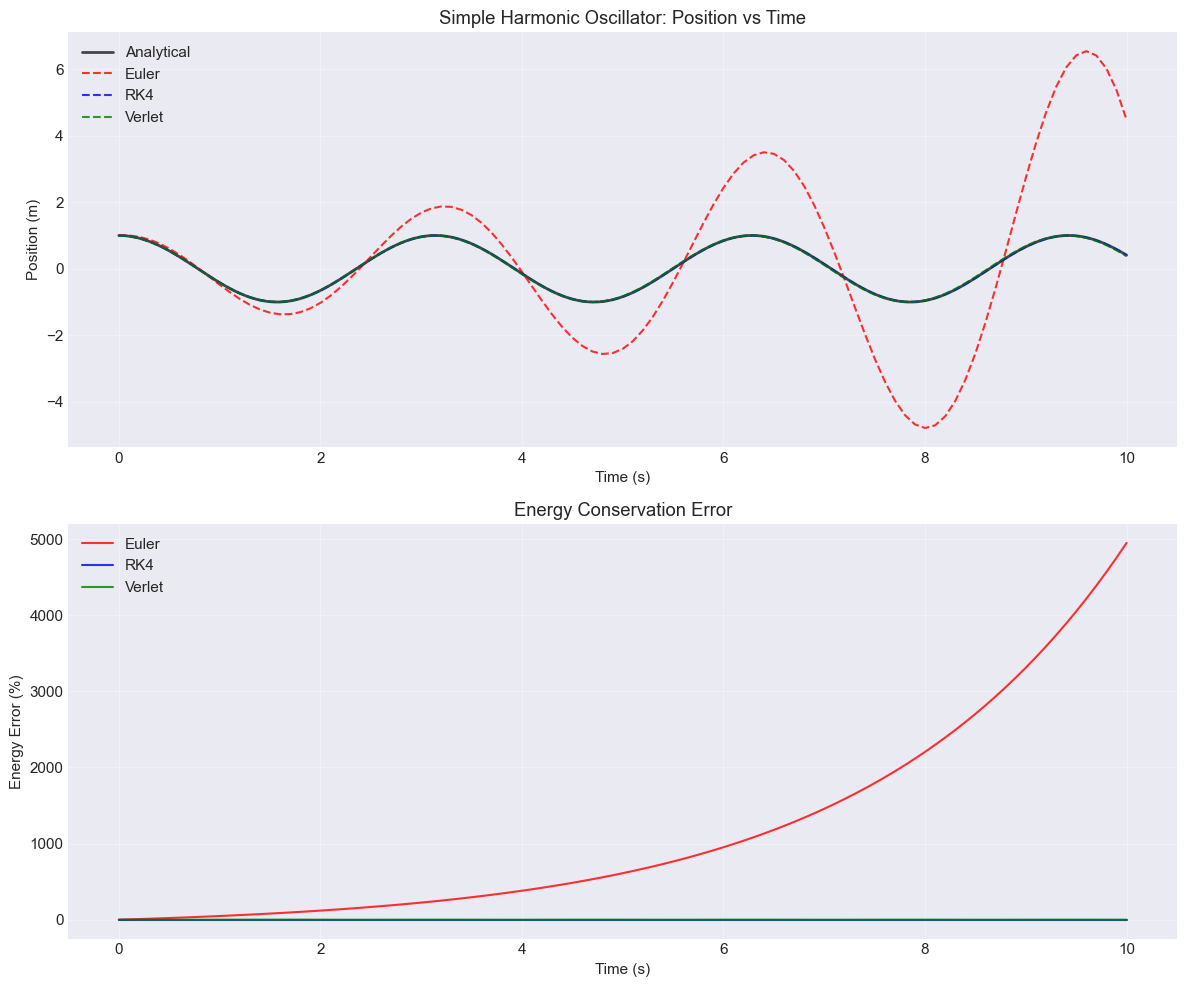

In [8]:
# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Position vs time
ax1.plot(t_exact, x_exact, 'k-', linewidth=2, label='Analytical', alpha=0.7)
ax1.plot(t_euler, y_euler[:, 0], 'r--', linewidth=1.5, label='Euler', alpha=0.8)
ax1.plot(t_rk4, y_rk4[:, 0], 'b--', linewidth=1.5, label='RK4', alpha=0.8)
ax1.plot(t_verlet, x_verlet[:, 0], 'g--', linewidth=1.5, label='Verlet', alpha=0.8)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)')
ax1.set_title('Simple Harmonic Oscillator: Position vs Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Energy conservation
E_euler = 0.5 * (y_euler[:, 1]**2 + omega**2 * y_euler[:, 0]**2)
E_rk4 = 0.5 * (y_rk4[:, 1]**2 + omega**2 * y_rk4[:, 0]**2)
E_verlet = 0.5 * (v_verlet[:, 0]**2 + omega**2 * x_verlet[:, 0]**2)
E_exact = 0.5 * omega**2 * A**2  # Constant

ax2.plot(t_euler, (E_euler - E_exact) / E_exact * 100, 'r-', linewidth=1.5, label='Euler', alpha=0.8)
ax2.plot(t_rk4, (E_rk4 - E_exact) / E_exact * 100, 'b-', linewidth=1.5, label='RK4', alpha=0.8)
ax2.plot(t_verlet, (E_verlet - E_exact) / E_exact * 100, 'g-', linewidth=1.5, label='Verlet', alpha=0.8)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Energy Error (%)')
ax2.set_title('Energy Conservation Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Print results for energy error when the simulation ends

In [9]:
print(f"Final energy errors:")
print(f"  Euler:  {abs(E_euler[-1] - E_exact) / E_exact * 100:.2f}%")
print(f"  RK4:    {abs(E_rk4[-1] - E_exact) / E_exact * 100:.2e}%")
print(f"  Verlet: {abs(E_verlet[-1] - E_exact) / E_exact * 100:.2e}%")

Final energy errors:
  Euler:  4950.49%
  RK4:    8.84e-03%
  Verlet: 8.58e-01%


Observations:
* Euler's method is very poor for this problem, which is not unexpected given the error in this method is $O(h)$.
* RK4 and Verlet both have less than 1% error, where we stopped, with RK4 appearing to perform better by a factor of ~100.

Before moving on, let's take a closer look at the long time behavior of the system to understand see that Verlet is better than RK4 in the long run. Rerun the cells above changing the end time of the simulation to 20s, then 30 s, then 40 s. What do you notice about the change in error for RK4 vs Verlet? Does this make sense?

---
### 2.1 Damped Harmonic Oscillator

Adding a damping term (friction/resistance):

$$m\frac{d^2x}{dt^2} = -kx - b\frac{dx}{dt}$$

or:

$$\frac{d^2x}{dt^2} = -\omega^2 x - 2\gamma \frac{dx}{dt}$$

where $\gamma = b/(2m)$ is the damping coefficient.

**Regimes:**
- Underdamped: $\gamma < \omega$
- Critically damped: $\gamma = \omega$
- Overdamped: $\gamma > \omega$

Start by setting up the system and parameters in the cell below. Here we will examine the underdamped system, as the other two options do not have oscillitory solutions. 

In [10]:
# Parameters for underdamped oscillator
omega = 2.0
gamma = 0.3  # Light damping
A = 1.0
t_span = (0, 14)
h = 0.01

x0 = A
v0 = 0.0

# Define the damped oscillator
def damped_oscillator(t, y):
    x, v = y
    return np.array([v, -omega**2 * x - 2*gamma * v])

def damped_acceleration(t, x, v):
    return -omega**2 * x - 2*gamma * v

Find solutions using the three methods

In [11]:
t_euler, y_euler = euler_method(damped_oscillator, t_span, [x0, v0], h)
t_rk4, y_rk4 = rk4_method(damped_oscillator, t_span, [x0, v0], h)
t_verlet, x_verlet, v_verlet = verlet_method(damped_acceleration, t_span, x0, v0, h)

Also create the analytic solution for comparison

In [12]:
# Analytical solution (underdamped case)
omega_d = np.sqrt(omega**2 - gamma**2)  # Damped frequency
t_exact = np.linspace(t_span[0], t_span[1], 1000)
x_exact = A * np.exp(-gamma * t_exact) * np.cos(omega_d * t_exact)

Plot and examine the results

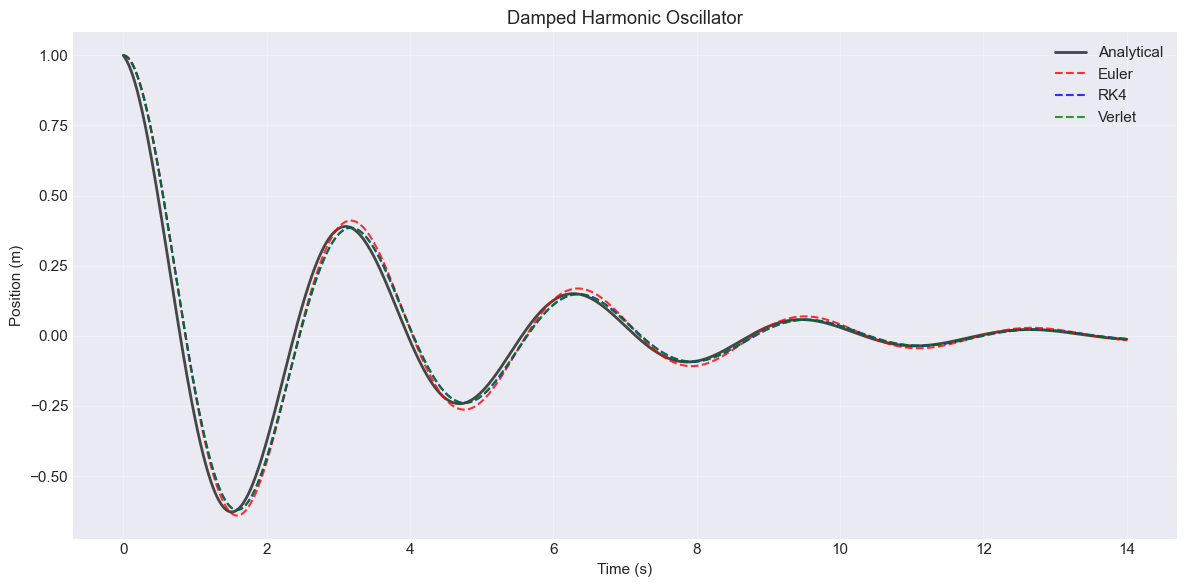

In [13]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(t_exact, x_exact, 'k-', linewidth=2, label='Analytical', alpha=0.7)
plt.plot(t_euler, y_euler[:, 0], 'r--', linewidth=1.5, label='Euler', alpha=0.8)
plt.plot(t_rk4, y_rk4[:, 0], 'b--', linewidth=1.5, label='RK4', alpha=0.8)
plt.plot(t_verlet, x_verlet[:, 0], 'g--', linewidth=1.5, label='Verlet', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Damped Harmonic Oscillator')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.3 Projectile Motion with Air Resistance

A projectile under gravity with quadratic air drag:

$$m\frac{d^2\mathbf{r}}{dt^2} = m\mathbf{g} - \frac{1}{2}C_d \rho A |\mathbf{v}|\mathbf{v}$$

For simplicity, we use linear drag: $\mathbf{F}_{drag} = -b\mathbf{v}$

**Equations:**
$$\frac{dx}{dt} = v_x, \quad \frac{dv_x}{dt} = -\gamma v_x$$
$$\frac{dy}{dt} = v_y, \quad \frac{dv_y}{dt} = -g -\gamma v_y$$

Start by defining the system parameters and defining the problem

In [14]:
# Parameters
g = 9.81  # Gravity (m/s^2)
gamma = 0.1  # Drag coefficient
v0 = 30.0  # Initial speed (m/s)
angle = 45.0  # Launch angle (degrees)
t_span = (0, 6)
h = 0.01

# Initial conditions
theta = np.radians(angle)
x0, y0 = 0.0, 0.0
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

# Define projectile motion
def projectile_motion(t, y):
    x, y_pos, vx, vy = y
    return np.array([vx, vy, -gamma * vx, -g - gamma * vy])

def projectile_acceleration(t, r, v):
    x, y_pos = r
    vx, vy = v
    return np.array([-gamma * vx, -g - gamma * vy])

Solve the problem using both RK4 and Verlet (skip Euler's method here because of accuracy issues)

In [15]:
# Solve
t_rk4, y_rk4 = rk4_method(projectile_motion, t_span, [x0, y0, vx0, vy0], h)
t_verlet, r_verlet, v_verlet = verlet_method(projectile_acceleration, t_span, [x0, y0], [vx0, vy0], h)

# Truncate when hitting ground
idx_rk4 = np.where(y_rk4[:, 1] >= 0)[0]
idx_verlet = np.where(r_verlet[:, 1] >= 0)[0]

# create time and position arrays 
t_rk4 = t_rk4[idx_rk4]
y_rk4 = y_rk4[idx_rk4]
t_verlet = t_verlet[idx_verlet]
r_verlet = r_verlet[idx_verlet]

Plot and compare the results

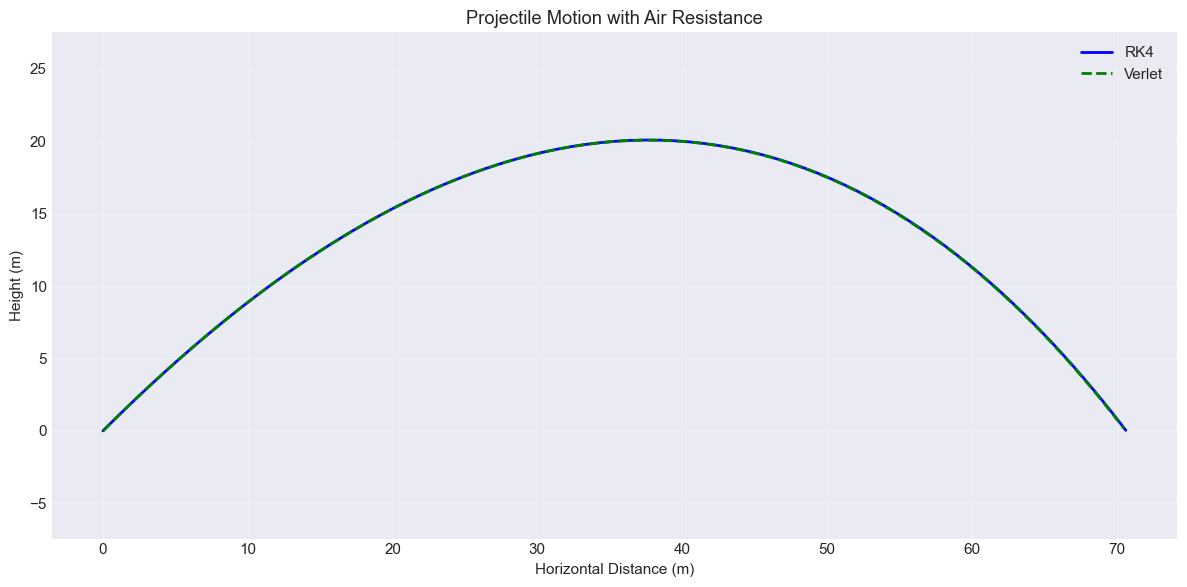

In [16]:
# Plot trajectory
plt.figure(figsize=(12, 6))
plt.plot(y_rk4[:, 0], y_rk4[:, 1], 'b-', linewidth=2, label='RK4')
plt.plot(r_verlet[:, 0], r_verlet[:, 1], 'g--', linewidth=2, label='Verlet')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion with Air Resistance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

Compare the final distance determined by both methods

In [17]:
print(f"Range (RK4):    {y_rk4[-1, 0]:.2f} m")
print(f"Range (Verlet): {r_verlet[-1, 0]:.2f} m")

Range (RK4):    70.64 m
Range (Verlet): 70.50 m


Recall from physics I, that the non-air drag version of this problem predicts that projectiles that have complementary angles ($\theta_1 + \theta_2 = 90\degree)$ have the same horizontal range. Demonstrate that this property is not true when considering air drag by re-running the simulation at $\theta_1 = 30\degree$ and $\theta_2 = 60\degree$. Which angle is predicted to go further? Does this make sense? Also, is there much of a difference between the predictions of the two methods?

### 1.4 Lorenz System

The Lorenz system is a simplified model of atmospheric convection, discovered by Edward Lorenz in 1963. It's one of the most famous examples of a chaotic dynamical system.

**Equations:**

$$\frac{dx}{dt} = \sigma(y - x)$$

$$\frac{dy}{dt} = x(\rho - z) - y$$

$$\frac{dz}{dt} = xy - \beta z$$

**Parameters:**
- $\sigma$ (sigma): Prandtl number (ratio of fluid viscosity to thermal diffusivity)
- $\rho$ (rho): Rayleigh number (relates to temperature difference)
- $\beta$ (beta): Geometric factor

**Classic values:** $\sigma = 10$, $\beta = 8/3$, $\rho = 28$ (chaotic regime)

**Key Properties:**
- **Strange Attractor**: Solutions converge to a fractal structure called the Lorenz attractor
- **Butterfly Effect**: Tiny changes in initial conditions lead to vastly different outcomes
- **Deterministic Chaos**: Despite being deterministic, long-term prediction is impossible
- **Not Conservative**: This system dissapates energy



Let's define the system and parameters including the initial values for the simulation

In [18]:
# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Initial conditions
y0 = [1.0, 1.0, 1.0]
t_span = (0, 50)
h = 0.01

def lorenz_system(t, state):
    """
    Lorenz system equations.
    
    State vector: [x, y, z]
    """
    x, y, z = state
    
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    
    return np.array([dx, dy, dz])

Run the simulation using Euler and RK4

In [19]:
print("Solving Lorenz system with Euler's method...")
t_euler, y_euler = euler_method(lorenz_system, t_span, y0, h)

print("Solving Lorenz system with RK4...")
t_rk4, y_rk4 = rk4_method(lorenz_system, t_span, y0, h)

print("Done!")

Solving Lorenz system with Euler's method...
Solving Lorenz system with RK4...
Done!


Plot the results

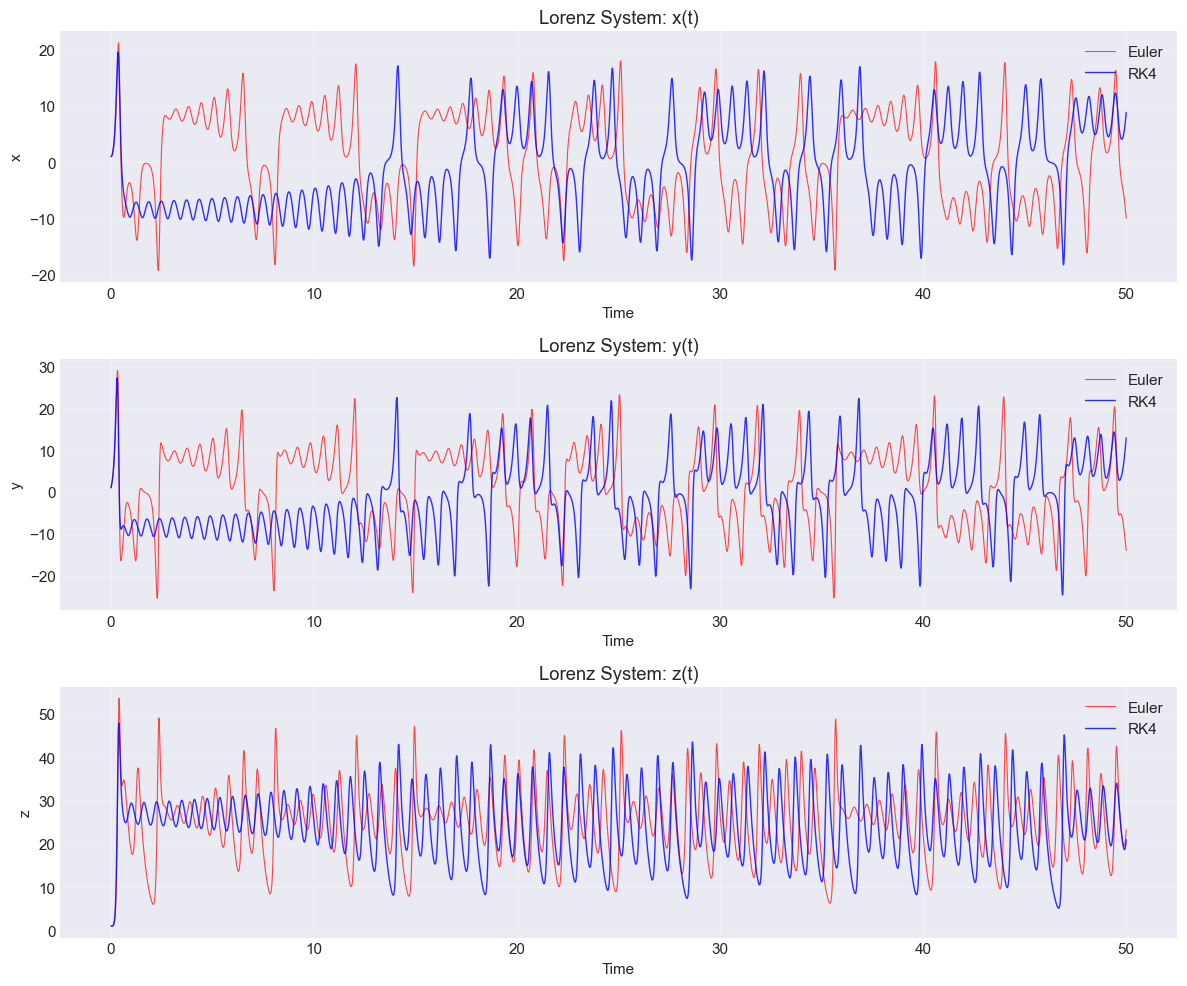

In [20]:
# Plot time series
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

variables = ['x', 'y', 'z']
for i, (ax, var) in enumerate(zip(axes, variables)):
    ax.plot(t_euler, y_euler[:, i], 'r-', linewidth=0.8, label='Euler', alpha=0.7)
    ax.plot(t_rk4, y_rk4[:, i], 'b-', linewidth=1, label='RK4', alpha=0.8)
    ax.set_xlabel('Time')
    ax.set_ylabel(var)
    ax.set_title(f'Lorenz System: {var}(t)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Demonstrate the Lorenz attractor by plotting trajetories in 3D

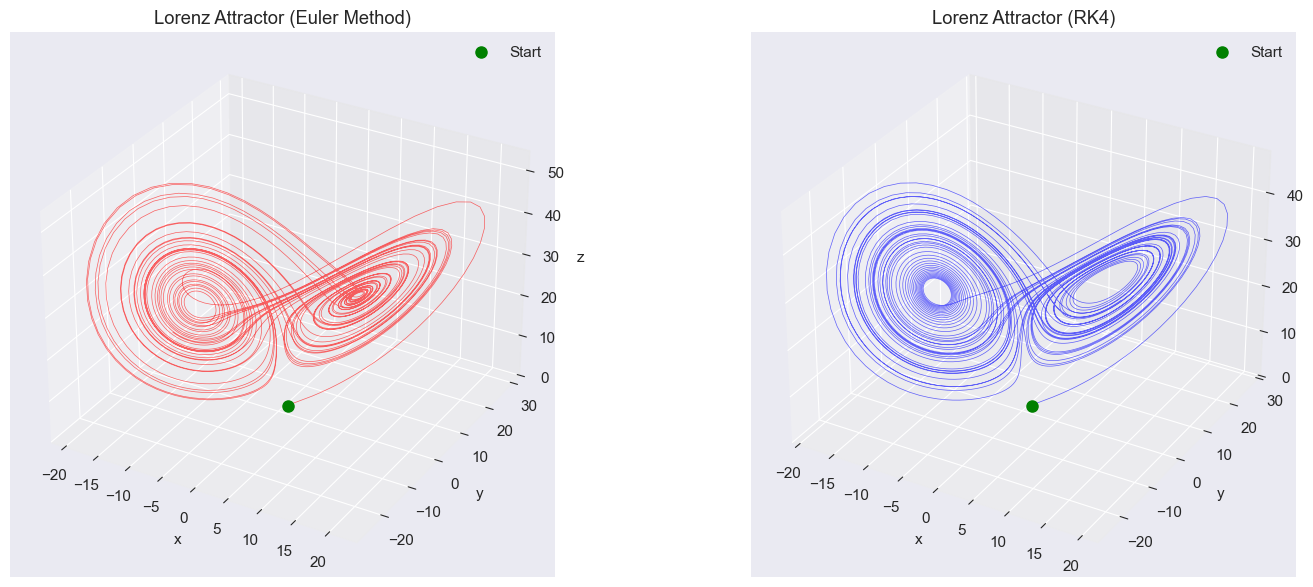

In [21]:
# Plot the famous Lorenz attractor in 3D
fig = plt.figure(figsize=(16, 6))

# Euler solution
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(y_euler[:, 0], y_euler[:, 1], y_euler[:, 2], 'r-', linewidth=0.5, alpha=0.6)
ax1.plot([y_euler[0, 0]], [y_euler[0, 1]], [y_euler[0, 2]], 'go', markersize=8, label='Start')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Lorenz Attractor (Euler Method)')
ax1.legend()

# RK4 solution
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], 'b-', linewidth=0.5, alpha=0.6)
ax2.plot([y_rk4[0, 0]], [y_rk4[0, 1]], [y_rk4[0, 2]], 'go', markersize=8, label='Start')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Lorenz Attractor (RK4)')
ax2.legend()

plt.tight_layout()
plt.show()

Now, let's examine why this system is chaotic. Try adding a very small pertibation to the initial conditions and compare with the original problem result. 

In [22]:
# Two nearly identical initial conditions
epsilon = 1e-8  # Incredibly small perturbation!

y0_a = [1.0, 1.0, 1.0]
y0_b = [1.0 + epsilon, 1.0, 1.0]

t_span = (0, 40)
h = 0.005

print(f"Simulating trajectory A...")
t_a, y_a = rk4_method(lorenz_system, t_span, y0_a, h)

print(f"Simulating trajectory B (x₀ = 1 + {epsilon})...")
t_b, y_b = rk4_method(lorenz_system, t_span, y0_b, h)

# Calculate Euclidean distance between trajectories
distance = np.sqrt((y_a[:, 0] - y_b[:, 0])**2 + 
                   (y_a[:, 1] - y_b[:, 1])**2 + 
                   (y_a[:, 2] - y_b[:, 2])**2)

print("Done!")

Simulating trajectory A...
Simulating trajectory B (x₀ = 1 + 1e-08)...
Done!


Plot and compare the results

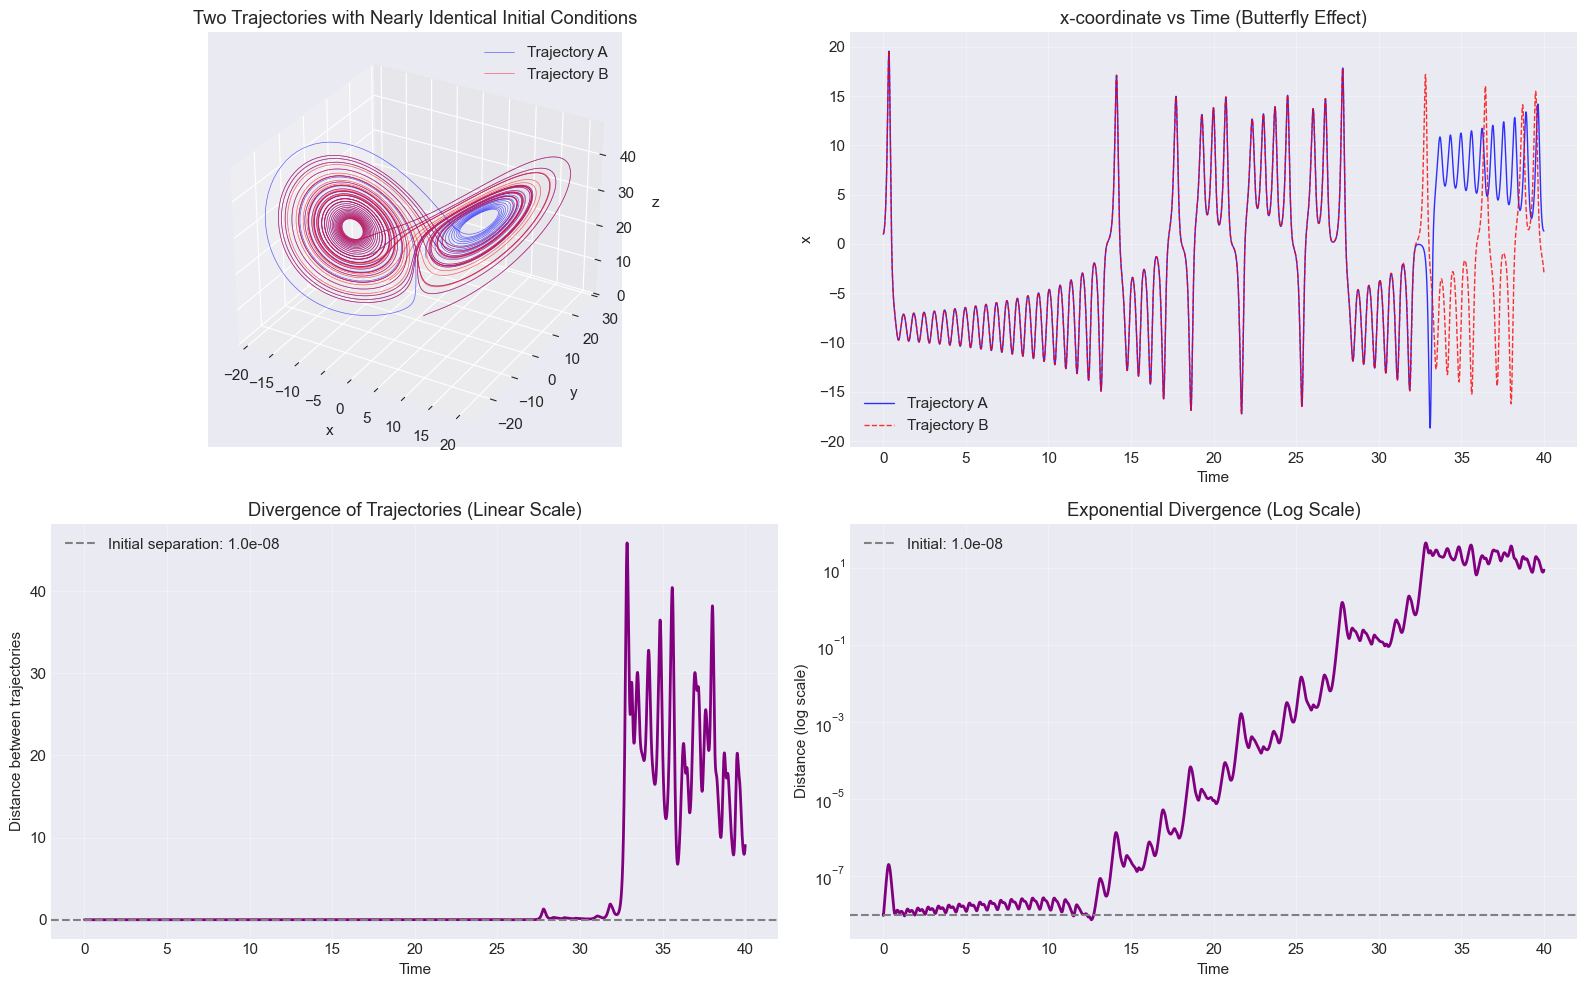


Approximate largest Lyapunov exponent: 0.788
(Theoretical value for classic Lorenz system: ~0.9)

This means predictability is lost after approximately 1.3 time units


In [23]:
# Plot chaos demonstration
fig = plt.figure(figsize=(16, 10))

# 3D trajectories
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(y_a[:, 0], y_a[:, 1], y_a[:, 2], 'b-', linewidth=0.5, alpha=0.6, label='Trajectory A')
ax1.plot(y_b[:, 0], y_b[:, 1], y_b[:, 2], 'r-', linewidth=0.5, alpha=0.6, label='Trajectory B')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Two Trajectories with Nearly Identical Initial Conditions')
ax1.legend()

# x vs time
ax2 = fig.add_subplot(222)
ax2.plot(t_a, y_a[:, 0], 'b-', linewidth=1, label='Trajectory A', alpha=0.8)
ax2.plot(t_b, y_b[:, 0], 'r--', linewidth=1, label='Trajectory B', alpha=0.8)
ax2.set_xlabel('Time')
ax2.set_ylabel('x')
ax2.set_title('x-coordinate vs Time (Butterfly Effect)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distance between trajectories (linear scale)
ax3 = fig.add_subplot(223)
ax3.plot(t_a, distance, 'purple', linewidth=2)
ax3.axhline(y=epsilon, color='gray', linestyle='--', label=f'Initial separation: {epsilon:.1e}')
ax3.set_xlabel('Time')
ax3.set_ylabel('Distance between trajectories')
ax3.set_title('Divergence of Trajectories (Linear Scale)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Distance (log scale)
ax4 = fig.add_subplot(224)
ax4.semilogy(t_a, distance, 'purple', linewidth=2)
ax4.axhline(y=epsilon, color='gray', linestyle='--', label=f'Initial: {epsilon:.1e}')
ax4.set_xlabel('Time')
ax4.set_ylabel('Distance (log scale)')
ax4.set_title('Exponential Divergence (Log Scale)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estimate Lyapunov exponent
# Find region of exponential growth
idx_valid = (distance > epsilon * 10) & (distance < 1)
if np.any(idx_valid):
    t_valid = t_a[idx_valid]
    dist_valid = distance[idx_valid]
    
    coeffs = np.polyfit(t_valid, np.log(dist_valid), 1)
    lyapunov_lorenz = coeffs[0]
    
    print(f"\nApproximate largest Lyapunov exponent: {lyapunov_lorenz:.3f}")
    print(f"(Theoretical value for classic Lorenz system: ~0.9)")
    print(f"\nThis means predictability is lost after approximately {1/lyapunov_lorenz:.1f} time units")

This demonstrates the strong dependance on initial conditions for this sort of problem, and is one of the primary reasons why long term weather forecasts are not very accurate. 